# Perform Classification

In [49]:
import numpy as np
%pylab inline
X_train_LSI = np.load('./data/X_train_LSI.npy')
X_test_LSI =np.load('./data/X_test_LSI.npy')
y_train_LSI = np.load('./data/y_train_LSI.npy')
y_test_LSI = np.load('./data/y_test_LSI.npy')

Populating the interactive namespace from numpy and matplotlib


In [64]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(C=0.000001)
svm_model.fit(X_train_LSI,y_train_LSI)
y_test_predicted = svm_model.predict(X_test_LSI)
y_score = svm_model.decision_function(X_test_LSI)

accuracy:  0.962857142857


In [65]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test_LSI, y_test_predicted, average=None)  
recall = recall_score(y_test_LSI, y_test_predicted, average=None)
print 'accuracy: ', 1.0*sum(y_test_predicted==y_test_LSI) / y_test_LSI.shape[0]
print 'precision: ', precision
print 'recall: ', recall

accuracy:  0.962857142857
precision:  [ 0.98132088  0.94609328]
recall:  [ 0.94294872  0.98238994]


In [66]:
print y_test_LSI.shape
def makeDecisionArray(y):
    y_test = np.array([[0 for i in range(2)] for j in range(len(y_test_LSI))])
    for i in range(len(y_test_LSI)):
        y_test[i][y_test_LSI[i]]=1
    return y_test
y_test = makeDecisionArray(y_test_LSI)
print y_test.shape

(3150,)
(3150, 2)


In [67]:
y_score.shape

(3150,)

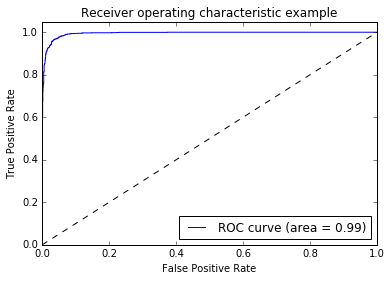

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(y_test_LSI, y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_LSI.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_LSI, y_test_predicted)

array([[1471,   89],
       [  28, 1562]])

# Featch data and select features for multi-class classification

In [10]:
import numpy as np
###save X and y for multi-class classification
X_train_LSI_multi = np.load('./data/X_train_LSI_multi.npy')
X_test_LSI_multi = np.load('./data/X_test_LSI_multi.npy')
y_train_LSI_multi = np.load('./data/y_train_LSI_multi.npy')
y_test_LSI_multi = np.load('./data/y_test_LSI_multi.npy')

In [11]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
label_test = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train_LSI_multi, y_train_LSI_multi).predict(X_test_LSI_multi)
print 'accuracy: ', 1.0*sum(label_test==y_test_LSI_multi) / y_test_LSI_multi.shape[0]

accuracy:  0.877955271565
